In [47]:
import numpy as np
import pandas as pd


In [23]:
import yfinance as yf

nasdaq = yf.Ticker("^NDX")  
data = nasdaq.history(period="5y")  
print(data.head())
print(data.tail())

                                  Open         High          Low        Close  \
Date                                                                            
2020-02-27 00:00:00-05:00  8632.540039  8786.679688  8430.530273  8436.669922   
2020-02-28 00:00:00-05:00  8133.850098  8490.469727  8133.850098  8461.830078   
2020-03-02 00:00:00-05:00  8569.910156  8879.389648  8446.500000  8877.980469   
2020-03-03 00:00:00-05:00  8892.679688  9000.459961  8516.580078  8594.490234   
2020-03-04 00:00:00-05:00  8745.639648  8952.110352  8669.759766  8949.280273   

                               Volume  Dividends  Stock Splits  
Date                                                            
2020-02-27 00:00:00-05:00  4559900000        0.0           0.0  
2020-02-28 00:00:00-05:00  5320020000        0.0           0.0  
2020-03-02 00:00:00-05:00  4249020000        0.0           0.0  
2020-03-03 00:00:00-05:00  4336700000        0.0           0.0  
2020-03-04 00:00:00-05:00  3634760000     

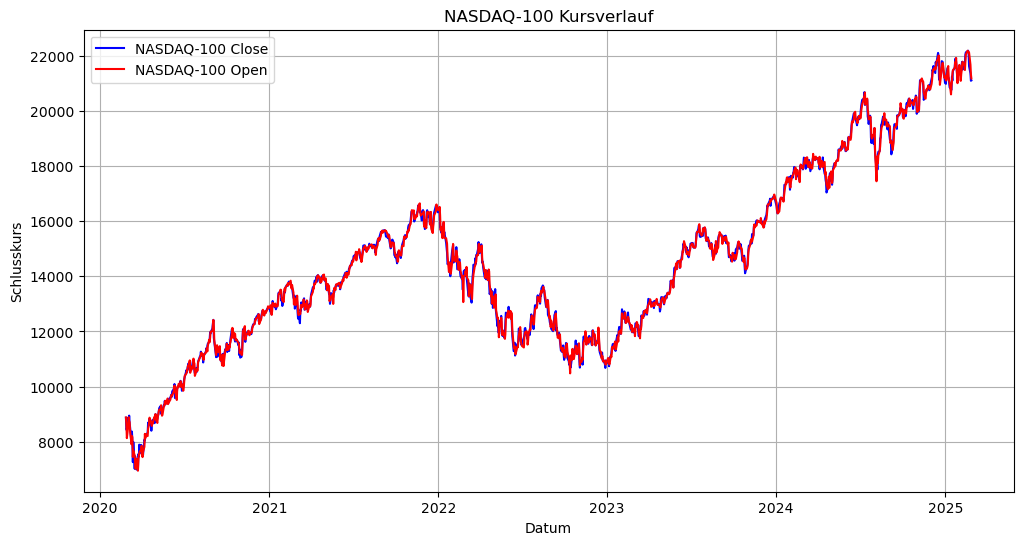

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(data.index, data["Close"], label="NASDAQ-100 Close", color="blue")
plt.plot(data.index, data["Open"], label = "NASDAQ-100 Open", color="red")
plt.xlabel("Datum")
plt.ylabel("Schlusskurs")
plt.title("NASDAQ-100 Kursverlauf")
plt.legend()
plt.grid()
plt.show()

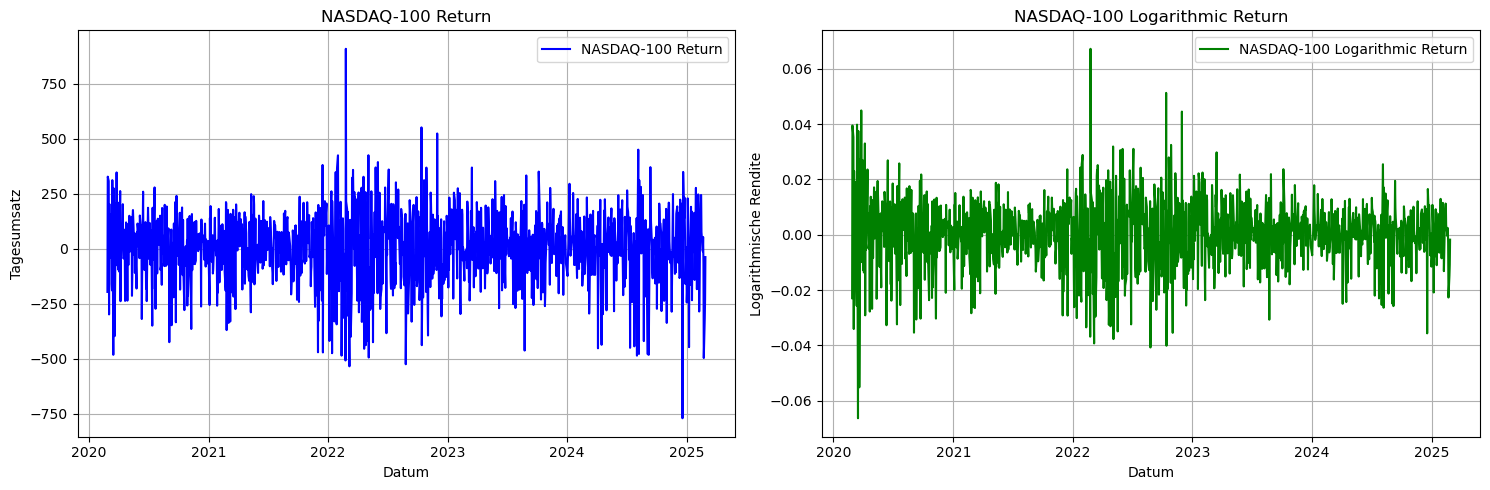

In [31]:
import math
data["Return"] = data["Close"]-data["Open"]
data["LogReturn"] = np.log(data["Close"] / data["Open"])



fig, ax = plt.subplots(1, 2, figsize=(15, 5))


ax[0].plot(data.index, data["Return"], label="NASDAQ-100 Return", color="blue")
ax[0].set_xlabel("Datum")
ax[0].set_ylabel("Tagesumsatz")
ax[0].set_title("NASDAQ-100 Return")
ax[0].legend()
ax[0].grid()


ax[1].plot(data.index, data["LogReturn"], label="NASDAQ-100 Logarithmic Return", color="green")
ax[1].set_xlabel("Datum")
ax[1].set_ylabel("Logarithmische Rendite")
ax[1].set_title("NASDAQ-100 Logarithmic Return")
ax[1].legend()
ax[1].grid()


plt.tight_layout()
plt.show()

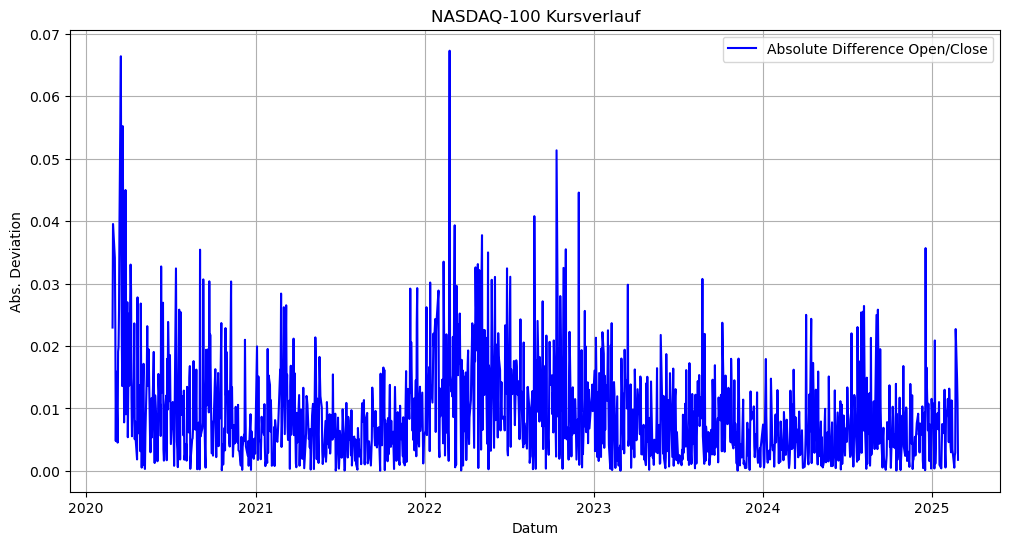

In [42]:
#Volatilität
data["LogReturn"] = np.log(data["Close"] / data["Open"])
data["ABS"] = abs(data["LogReturn"])
plt.figure(figsize=(12,6))
plt.plot(data.index, data["ABS"], label="Absolute Difference Open/Close", color="blue")
plt.xlabel("Datum")
plt.ylabel("Abs. Deviation")
plt.title("NASDAQ-100 Kursverlauf")
plt.legend()
plt.grid()
plt.show()


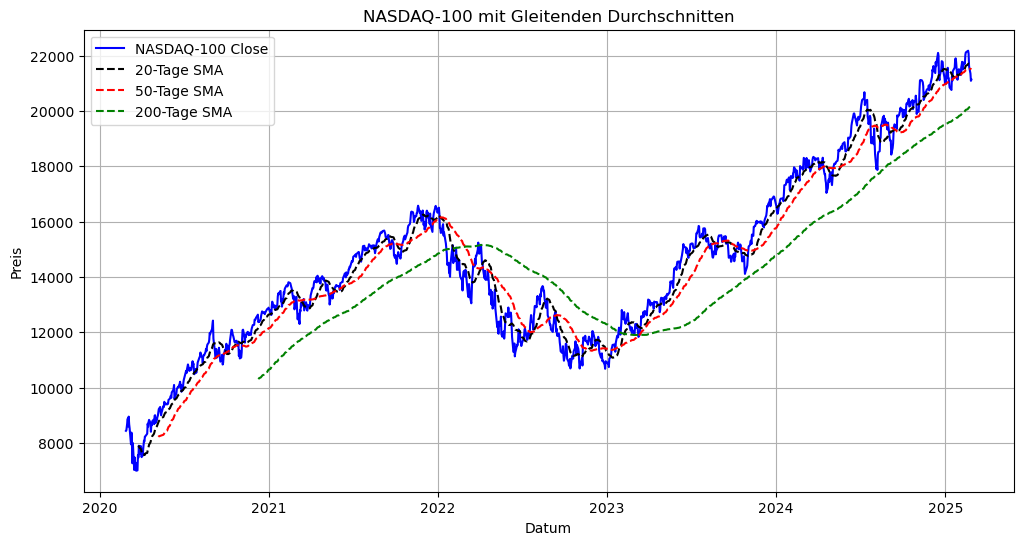

In [41]:
data["SMA20"] = data["Close"].rolling(window=20).mean()
data["SMA50"] = data["Close"].rolling(window=50).mean()
data["SMA200"] = data["Close"].rolling(window=200).mean()

plt.figure(figsize=(12,6))
plt.plot(data.index, data["Close"], label="NASDAQ-100 Close", color="blue")
plt.plot(data.index, data["SMA20"], label="20-Tage SMA", color="black",linestyle="--")
plt.plot(data.index, data["SMA50"], label="50-Tage SMA", color="red", linestyle="--")
plt.plot(data.index, data["SMA200"], label="200-Tage SMA", color="green", linestyle="--")
plt.xlabel("Datum")
plt.ylabel("Preis")
plt.title("NASDAQ-100 mit Gleitenden Durchschnitten")
plt.legend()
plt.grid()
plt.show()
# Je kleiner der Durchschnitt desto besser der Fit

In [46]:
#Model bauen
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split